Multiple_Linear_Regression_Bike_Sharing_Assignment

### > Problem Statement:


This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes.

Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

 ### > Reading and understanding Data

 Necessary imports for the code:

In [593]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm  


# Importing the required libraries for plots.
#import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [594]:
#Read the csv file using pandas
bsdf = pd.read_csv('day.csv')
bsdf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [595]:
# Check the descriptive information
bsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Data observation : 730 entries total , and 730 non null values in all columns, so no null values anywhere 

In [596]:
bsdf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [597]:
bsdf.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### > EDA

Uisng some domain knowledge and dropping irrelevant columns

In [598]:
# List of columns to drop
columns_to_drop = ['instant', 'casual', 'dteday', 'registered' ]

# Drop the specified columns
bsdf.drop(columns=columns_to_drop, inplace=True)

# Display the DataFrame after dropping columns
print("\nDataFrame after dropping columns:")
bsdf.head()


DataFrame after dropping columns:


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [599]:
bsdf.shape

(730, 12)

Finding correlation in data

In [600]:

bsdf.corr()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.272230e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.272230e-16,1.000000e+00,-5.149955e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.149955e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


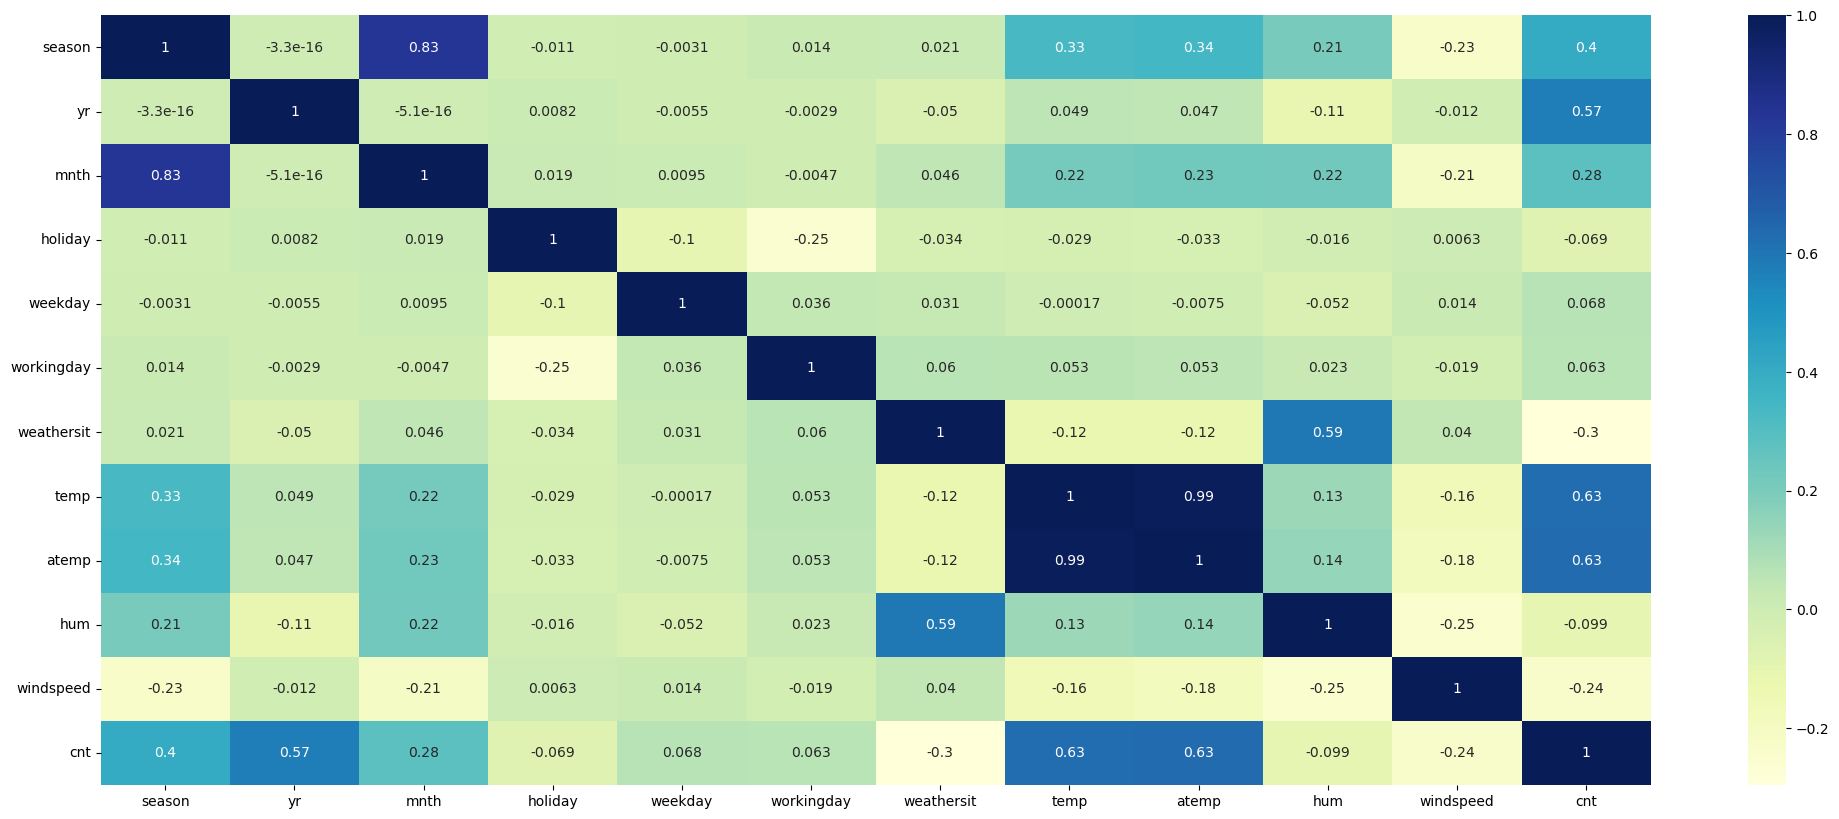

In [601]:
# Create a heatmap using seaborn
#Calculate Correlation
corr = bsdf.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

<Figure size 1500x3000 with 0 Axes>

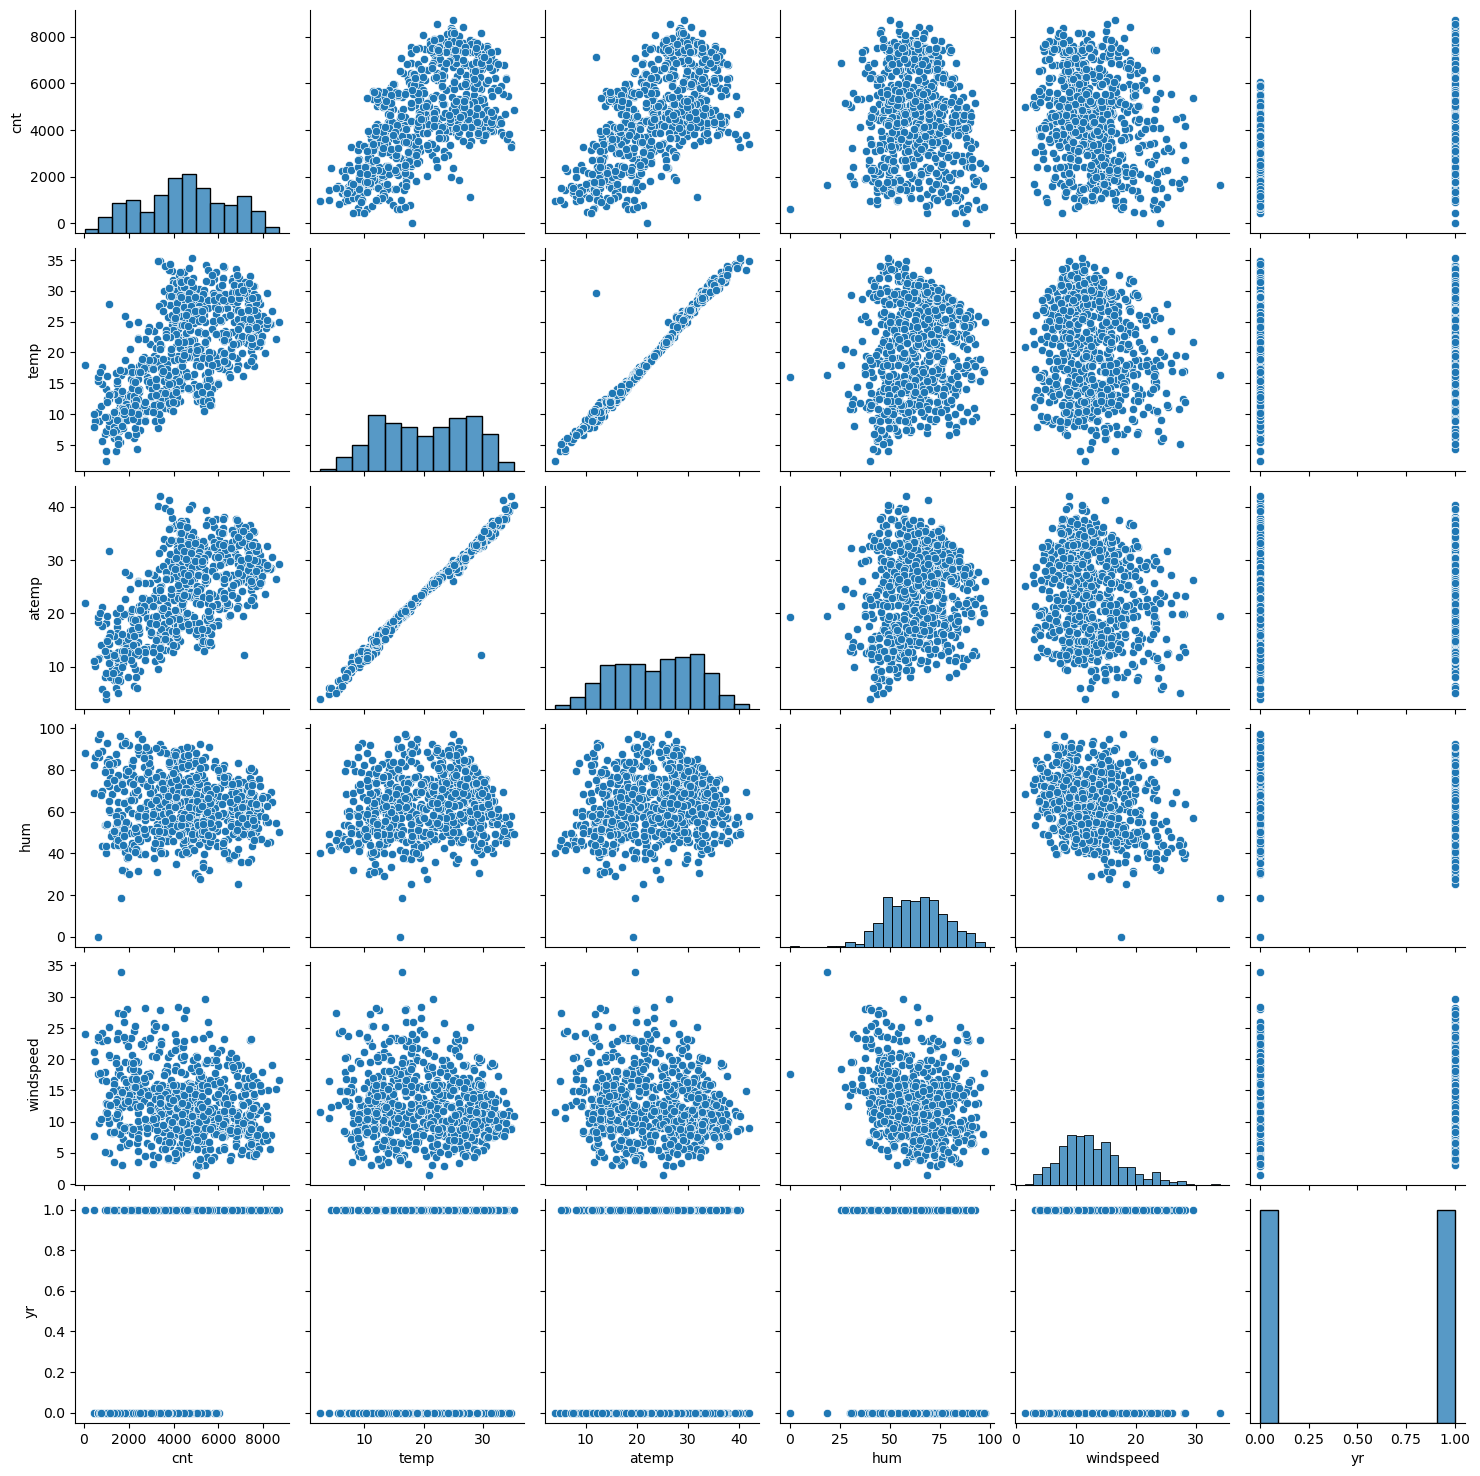

In [602]:
#Draw pairplots for continuous numeric variables 
plt.figure(figsize = (15,30))
sns.pairplot(data=bsdf,vars=['cnt', 'temp', 'atemp', 'hum','windspeed','yr' ])
plt.show()

Inference :

temp and atemp has the highest correlation with the target variable cnt

temp and atemp are highly co-related with each other

#### Linear regression can be a good fit to apply 

#### Observation from the correlation map, output variable has a linear relationship with variables temp, atemp.

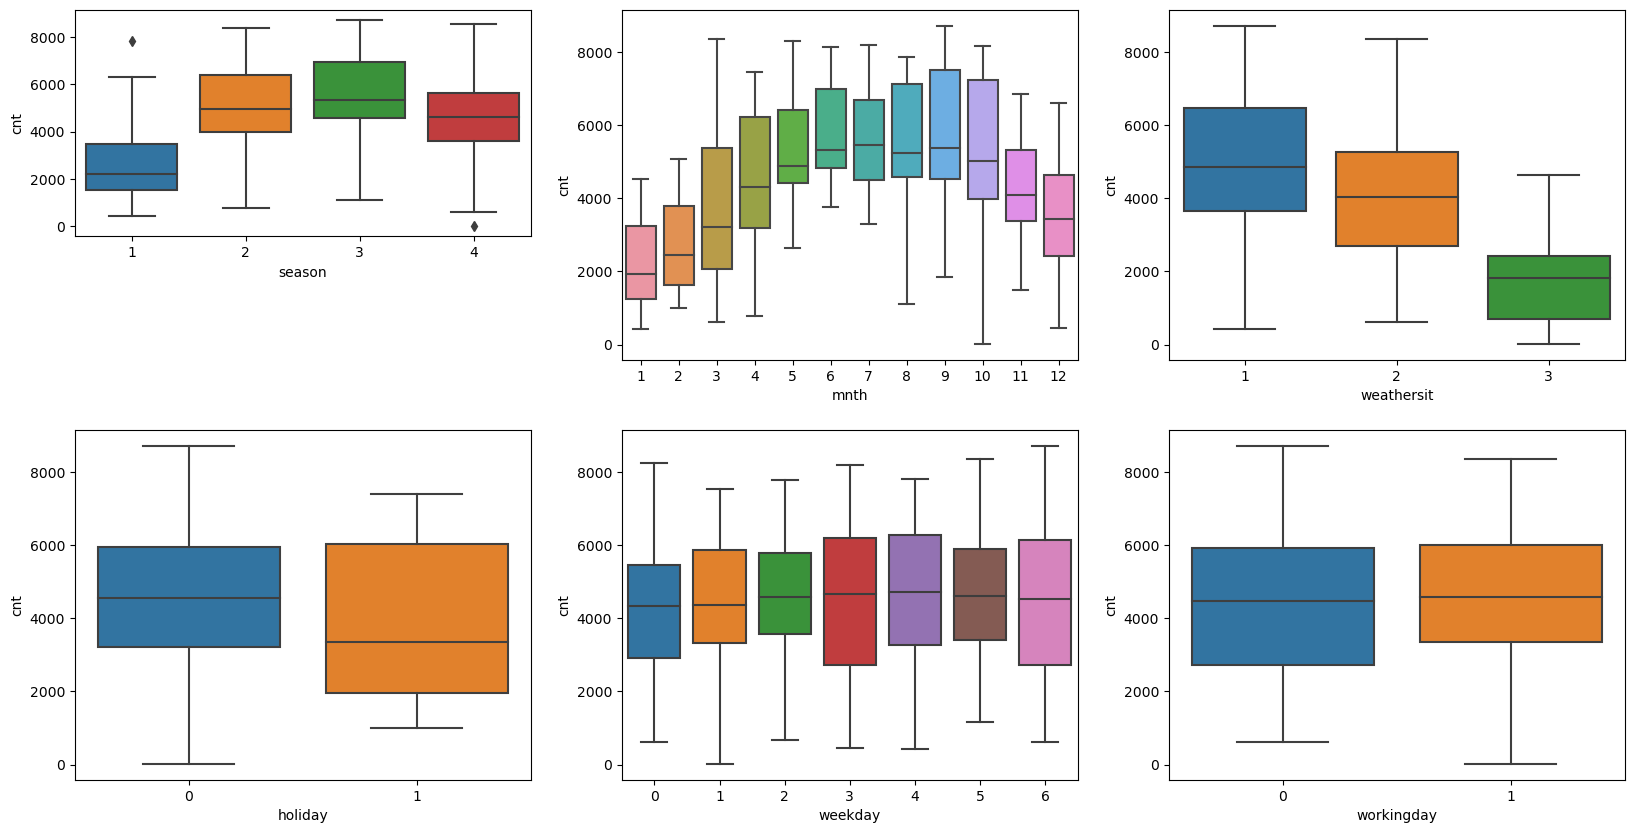

In [603]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(20, 10))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bsdf)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bsdf)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bsdf)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bsdf)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bsdf)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bsdf)
plt.show()

Observation: categorical variables clearly show how it is having realtion with count of Bikes 
- Season 3 has highest number of bike booking followed by 2 , 4 and 1
- September October and June are top 3 months for bike booking
- Most of the bike booking are on non-holidays-> Not much variation on different weekdays
- Highest number of bike booking are for weathersit1


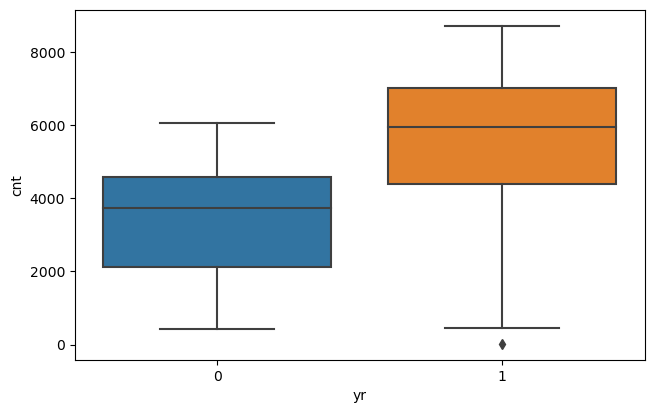

In [604]:
#year wise box plot
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bsdf)
plt.show()

Observation: Count is incresing with year 

### > Data Preperation


In [605]:
#Print number of unique values in all columns
bsdf.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

### Creating Dummy Variables

In [606]:
# Convert to 'category' data type

bsdf['season']=bsdf['season'].astype('category')
bsdf['weathersit']=bsdf['weathersit'].astype('category')
bsdf['mnth']=bsdf['mnth'].astype('category')
bsdf['weekday']=bsdf['weekday'].astype('category')

In [607]:
bsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [608]:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bsdf = pd.get_dummies(bsdf, drop_first=True)
bsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [609]:
bsdf.shape

(730, 30)


Splitting Data into Test and Train

In [610]:
df_train, df_test = train_test_split( bsdf, train_size=.7, random_state = 100 )
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


Scaling data using Min-Max Scaler

In [611]:
#creating MinMaxScaler
scaler = MinMaxScaler()

# variables to transform
num_vars = [ 'temp', 'atemp','hum','windspeed','cnt']

# train and transfrom
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0


In [612]:
#just cheking the changes; min, max values should be 0 and 1
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and Y sets for the model building :

In [613]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE
Recursive feature elimination

In [614]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)  # running RFE
rfe = rfe.fit(X_train, y_train)

In [615]:
#cheking which were selected 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 15),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 6),
 ('mnth_4', False, 8),
 ('mnth_5', False, 7),
 ('mnth_6', False, 9),
 ('mnth_7', False, 11),
 ('mnth_8', False, 4),
 ('mnth_9', True, 1),
 ('mnth_10', False, 5),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 3),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [616]:
# Filtering selected columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [617]:
# Filtering un-selected columns
X_train.columns[~rfe.support_]

Index(['atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2'],
      dtype='object')

#### > Building model using statsmodel, for the detailed statistics

In [618]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          4.91e-181
Time:                        03:18:14   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     495   BIC:                            -892.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2572      0.027      9.543   

 
#### After going through cycles of removal of variables ["weekday_5","weekday_3","weekday_4","weekday_1","weekday_2","workingday" ] based on P-value and observing no change in adjusted R squares :



In [619]:
X_train_new = X_train_rfe.drop(["weekday_5","weekday_3","weekday_4","weekday_1","weekday_2","workingday" ], axis = 1)

In [620]:
# Rebulding Model without variables mentioned above
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.2
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          4.74e-186
Time:                        03:18:14   Log-Likelihood:                 490.74
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     500   BIC:                            -919.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2682      0.026     10.234   

In [621]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_train_lm = X_train_lm.drop(["const"], axis = 1)
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.02
2,temp,7.11
4,windspeed,3.54
0,yr,2.01
6,season_4,1.64
5,season_2,1.58
7,mnth_9,1.20
8,weathersit_3,1.09
1,holiday,1.04


Analysis: hum has value much higher than 5 so it needs to eb removed as it can be explained by other variables

In [622]:
# removing hum and re-evaluating VIF
vif = pd.DataFrame()
X_train_lm = X_train_lm.drop(["hum"], axis = 1)
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,season_2,1.55
5,season_4,1.34
6,mnth_9,1.20
7,weathersit_3,1.06
1,holiday,1.03


Observation: All VIF values are < 5 now so model varaibles are in good shape now.

In [623]:
# Rebulding Model without variables mentioned above
X_train_lm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          9.22e-172
Time:                        03:18:14   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0875      0.017      5.029   

### > Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.
>If it is centered at Zero and well distrbuted then its good.

In [624]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

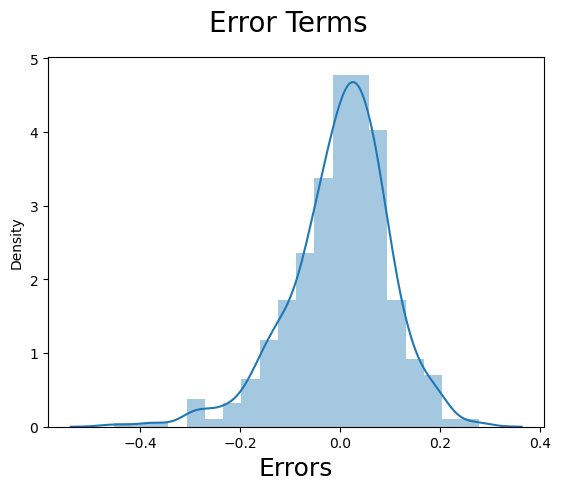

In [625]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

### >Making Predictions
#### Applying the scaling on the test sets

In [626]:
num_vars = [ 'temp', 'atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test



In [627]:
y_test = df_test.pop('cnt')
X_test = df_test

In [628]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4',
       'mnth_9', 'weathersit_3'],
      dtype='object')

In [629]:

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [630]:
# Adding a constant variable to X_test_new
X_test_new = sm.add_constant(df_test)
X_test_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [631]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test_new[X_train_lm.columns]


# Now, you can use the model to make predictions
y_pred = lm.predict(X_test_new)

### > Model Evaluation

Text(0, 0.5, 'y_pred')

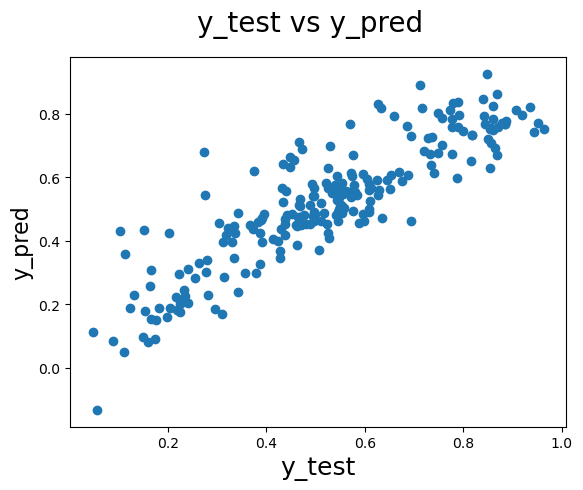

In [632]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

Inference:
We can observe that variance of the residuals (error terms) is constant across predictions. 
i.e error term does not vary much as the value of the predictor variable changes.

In [633]:
# Calculating R-Squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7720731949554799


In [634]:
# Calculating Adjusted R-Squared

# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7372843668171057

#### Plotting Graph of actual vs predicted

In [635]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-", label="Actual")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-", label="Predicted")
    plt.legend() 
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

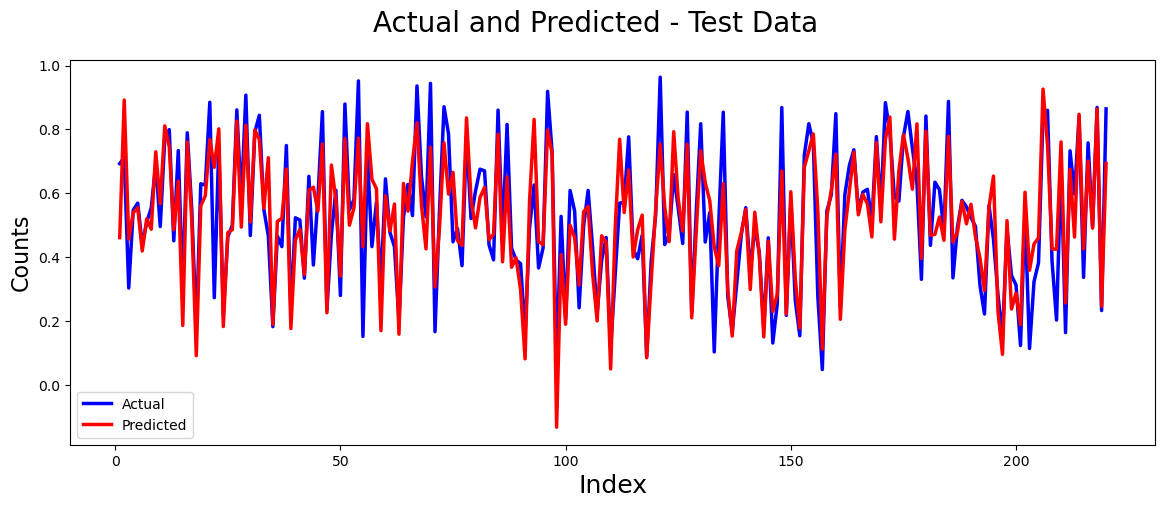

In [636]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_pred,len(y_test)+1,'Test Data')

Observation: Actual vs Predicted looks good, so model is usable.

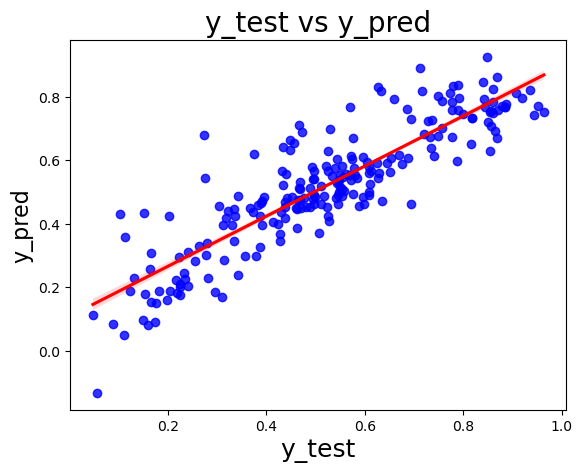

In [637]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Observation : Test Data Fit looks ok

### > Comparision between Training and Testing dataset:

- Train dataset R^2          : 0.804
- Test dataset R^2           : 0.7720
- Train dataset Adjusted R^2 : 0.801    
- Test dataset Adjusted R^2  : 0.7372

## > Conclusion 

#### Most important Variables to consider for predicting bikes demand are: 
- 'yr': Year,
- 'holiday',
- 'temp': Temperature, 
- 'windspeed', 
- 'season_2': Summer, 
- 'season_4': Winter,
- 'mnth_9' : September month,
- 'weathersit_3': Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during Spring.
and during September.

- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.

- There would be less bookings during Light Snow or Rain, they could probably use this time to servive the bikes without having business impact (data shows -ve coefficient ).

 Hence when the situation comes back to normal , the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.